In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

music_data =pd.read_csv('music.csv')
X = music_data.drop(columns=['genre'])
X

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [ ]:
y = music_data['genre']
y

,genre
0,HipHop
1,HipHop
2,HipHop
3,Jazz
4,Jazz
5,Jazz
6,Classical
7,Classical
8,Classical
9,Dance


In [ ]:
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

In [ ]:
predictions = model.predict([ [21,1],[22,0] ])
predictions

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop', 'Dance'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
score = accuracy_score(y_test,predictions)
score

1.0

In [ ]:
import joblib
joblib.dump(model,'music-recommender.joblib')

['music-recommender.joblib']

In [ ]:
model = joblib.load('music-recommender.joblib')
predictions = model.predict([[21,1]])
predictions

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop'], dtype=object)

In [ ]:
from sklearn import tree
tree.export_graphviz(model,out_file='music-recommender.dot',
                     feature_names=['age','gender'],
                     class_names=sorted(y.unique()),
                     label='all',
                     rounded=True,
                     filled=True)

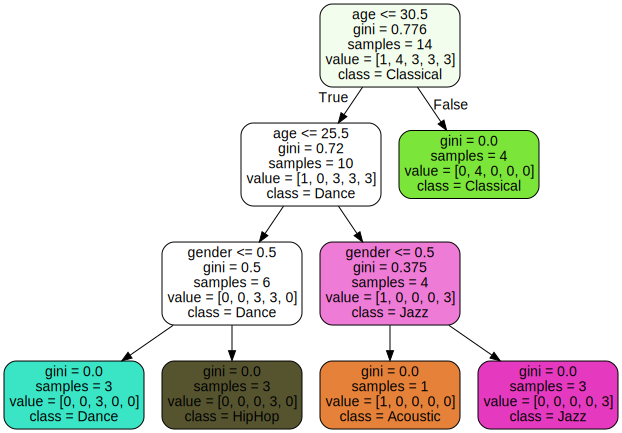

In [1]:
# Install Graphviz and Python bindings
!apt-get -qq install graphviz
!pip install graphviz

import graphviz

# Load your uploaded .dot file
dot_path = "/content/music-recommender.dot"

with open(dot_path) as f:
    dot_graph = f.read()

# Render and display inline
graph = graphviz.Source(dot_graph)
graph
